### Anova
[Tutorial](https://reneshbedre.github.io/blog/anova.html)<br>
[Udacity](https://classroom.udacity.com/courses/ud201/lessons/1234788951/concepts/1177087170923)

- [x] Lockdown
- [x] Push my commits to GitHub

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import statsmodels.api as sm

In [3]:
diet_df = pd.read_csv("https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv")

In [4]:
display(diet_df.head())
display(diet_df.shape)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


(78, 7)

In [5]:
diet_df[["Diet"]].drop_duplicates()

,Diet
0,2
2,1
30,3


In [6]:
diet_df.groupby(["Diet"]).agg({"Person" : pd.Series.nunique}).reset_index()

,Diet,Person
0,1,24
1,2,27
2,3,27


In [7]:
diet_df["weight_loss"] = diet_df["pre.weight"] - diet_df["weight6weeks"]
display(diet_df.head())

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7


In [8]:
diet_df[["weight_loss"]].describe()

,weight_loss
count,78.000000
mean,3.844872
std,2.551478
min,-2.100000
25%,2.000000
50%,3.600000
75%,5.550000
max,9.200000


This is a diet dataset, there are three classes of DIET and their effect on weight loss.

In [9]:
class_one   = diet_df[diet_df["Diet"] == 1][["weight_loss"]]
class_two   = diet_df[diet_df["Diet"] == 2][["weight_loss"]]
class_three = diet_df[diet_df["Diet"] == 3][["weight_loss"]]

describe_1 = class_one  .describe().rename(columns = {"weight_loss" : "weight_loss_one"  })
describe_2 = class_two  .describe().rename(columns = {"weight_loss" : "weight_loss_two"  })
describe_3 = class_three.describe().rename(columns = {"weight_loss" : "weight_loss_three"})

pd.concat([describe_1, describe_2, describe_3], axis = 1)

,weight_loss_one,weight_loss_two,weight_loss_three
count,24.000000,27.000000,27.000000
mean,3.300000,3.025926,5.148148
std,2.240148,2.523367,2.395568
min,-0.600000,-2.100000,0.500000
25%,1.975000,1.700000,3.450000
50%,3.050000,3.300000,5.400000
75%,3.950000,4.500000,7.000000
max,9.000000,7.900000,9.200000


Allows you to compare different samples at different point in time. <br>
Sum of squares between groups <br>
Sum of squares within groups <br>

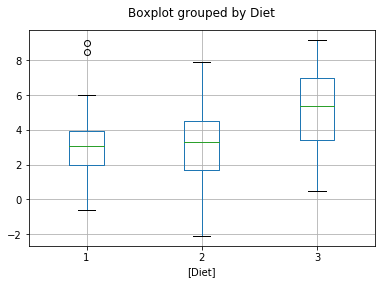

In [10]:
diet_df[["Diet", "weight_loss"]].boxplot(by = "Diet")
plt.title("")
plt.show()

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.<br>
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

ANOVA tells that there are significant(p<0.05) difference between groups, does not tell us which groups.

In [11]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(class_one, class_two, class_three)
print("F value     - ",fvalue, "\nP value     - ", pvalue)

F value     -  [6.19744745] 
P value     -  [0.00322901]


P-value is small, there is an overall significant effect of diet, on weight loss. We are not sure if the difference is between class_one or class_two or class_three

In [12]:

## get get the total sum of square
model = ols('diet_df.weight_loss ~ diet_df.Diet', data = diet_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     diet_df.weight_loss   R-squared:                       0.091
Model:                             OLS   Adj. R-squared:                  0.079
Method:                  Least Squares   F-statistic:                     7.639
Date:                 Sat, 18 Apr 2020   Prob (F-statistic):            0.00716
Time:                         12:58:04   Log-Likelihood:                -179.50
No. Observations:                   78   AIC:                             363.0
Df Residuals:                       76   BIC:                             367.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9113      0.753      2.540      0.013       0.413       3.410
diet_df.Diet     0.9485      0.343      2.764      0.007       0.265       1.632
==============================================================================
Omnibus:                        0.084   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.019
Skew:                          -0.031   Prob(JB):                        0.990
Kurtosis:                       2.955   Cond. No.                         7.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[How to interpret type i, type ii or type iii ANOVA ](https://stats.stackexchange.com/questions/20452/how-to-interpret-type-i-type-ii-and-type-iii-anova-and-manova)

In [13]:
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
diet_df.Diet,45.780976,1.0,7.638673,0.007164
Residual,455.491973,76.0,NaN,NaN


ANOVA Hypotheses <br>
Null hypotheses: Groups means are equal (no variation in means of groups) <br>
Alternative hypotheses: At least, one group mean is different from other groups

In [14]:
# load packages
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog= diet_df.weight_loss, groups= diet_df.Diet, alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.2741    0.9 -1.8806 1.3325  False
     1      3   1.8481 0.0201  0.2416 3.4547   True
     2      3   2.1222 0.0048  0.5636 3.6808   True
---------------------------------------------------


__3__ group is different from __1__ and __2__ and we can see that from ```_reject_ == True ```. <br>

Check for the the assumptions of ANOVA
1. Residuals (experimental error) are normally distributed (Shapiro Wilks Test)
2. Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
3. Observations are sampled independently from each other

In [15]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9928407669067383 0.9451920986175537


We fail to reject the NULL hypothesis, meaning the data is drawn from a normal distribution

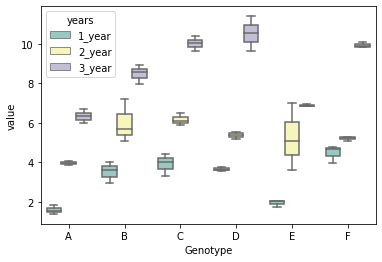

In [16]:
# load packages
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [17]:
# load packages

# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


Anova helps to see how to group means compare, are they similar to each to other?